# Company Attrition dataset-Analysis and Prediction

In [63]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier

### Loading the train and test data

In [64]:
df_test = pd.read_csv('Test_Dataset.csv')
df = pd.read_csv('Train_Dataset.csv')

In [65]:
df.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [66]:
df.tail()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
7805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# dropping all NaN rows 
df_train=df.iloc[0:5180,:]  # dropping all NaN rows 

In [68]:
df_train.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [69]:
df_train.tail()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
5175,5115176.0,0.0,36.0,Rarely,Analytics,13.0,CA,F,53.0,3.0,...,3.0,0.0,4.0,1.0,22.0,11.0,1.0,5.0,Single,22142.0
5176,5115177.0,0.0,NaN,Rarely,Marketing,9.0,CA,Female,66.0,1.0,...,4.0,1.0,9.0,0.0,23.0,8.0,0.0,2.0,Single,17109.0
5177,5115178.0,0.0,29.0,Rarely,Analytics,NaN,CA,Female,62.0,4.0,...,1.0,1.0,6.0,0.0,19.0,8.0,0.0,3.0,M,17532.0
5178,5115179.0,0.0,26.0,Rarely,Marketing,26.0,Statistics,Female,61.0,3.0,...,3.0,0.0,1.0,0.0,28.0,8.0,5.0,7.0,Divorsed,17942.0
5179,5115180.0,1.0,NaN,Yes,Sales,13.0,Statistics,Male,74.0,4.0,...,5.0,1.0,1.0,0.0,23.0,1.0,0.0,0.0,Divorsed,17033.0


In [70]:
df_test.head()

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,6110001,18.0,No,NaN,9.0,CA,Male,80.0,3,2,...,3,1,1,0,17.0,0.0,0.0,0.0,Single,16904.0
1,6110002,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1,3,...,1,1,2,1,18.0,2.0,1.0,NaN,Single,18994.0
2,6110003,50.0,Rarely,Analytics,19.0,CA,Female,76.0,3,3,...,5,0,5,1,22.0,18.0,3.0,3.0,M,18587.0
3,6110004,32.0,Rarely,Sales,23.0,Statistics,Female,73.0,5,2,...,3,0,4,1,17.0,5.0,3.0,3.0,Married,20559.0
4,6110005,39.0,Rarely,Analytics,7.0,CA,Male,42.0,4,1,...,5,1,4,0,20.0,9.0,1.0,7.0,Married,24991.0


In [71]:
df_test.tail()

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
2625,6112626,46.0,Rarely,Sales,12.0,Marketing Diploma,Male,76.0,3,5,...,5,1,5,1,18.0,10.0,1.0,3.0,Married,26761.0
2626,6112627,29.0,Rarely,Analytics,22.0,CA,Male,80.0,4,4,...,5,0,2,0,18.0,7.0,4.0,4.0,Divorsed,19196.0
2627,6112628,44.0,Rarely,Analytics,8.0,CA,F,42.0,4,1,...,1,1,3,0,19.0,24.0,5.0,17.0,Married,25248.0
2628,6112629,NaN,Rarely,Analytics,11.0,Statistics,Female,NaN,4,3,...,4,0,2,0,18.0,2.0,1.0,1.0,Single,17261.0
2629,6112630,50.0,Yes,Analytics,1.0,Statistics,F,73.0,3,4,...,4,1,3,1,24.0,28.0,0.0,7.0,Married,33172.0


In [72]:
print(df_train.shape)
print(df_test.shape)

(5180, 22)
(2630, 21)


In [73]:
5180+2630

7810

### Adding dummy dependent variable column as to indentify test data after combining train and test data

In [74]:
df_test['Attrition']='test_data'
df_test.head()

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Attrition
0,6110001,18.0,No,NaN,9.0,CA,Male,80.0,3,2,...,1,1,0,17.0,0.0,0.0,0.0,Single,16904.0,test_data
1,6110002,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1,3,...,1,2,1,18.0,2.0,1.0,NaN,Single,18994.0,test_data
2,6110003,50.0,Rarely,Analytics,19.0,CA,Female,76.0,3,3,...,0,5,1,22.0,18.0,3.0,3.0,M,18587.0,test_data
3,6110004,32.0,Rarely,Sales,23.0,Statistics,Female,73.0,5,2,...,0,4,1,17.0,5.0,3.0,3.0,Married,20559.0,test_data
4,6110005,39.0,Rarely,Analytics,7.0,CA,Male,42.0,4,1,...,1,4,0,20.0,9.0,1.0,7.0,Married,24991.0,test_data


In [75]:
#combinig train and test data to carry out preprocessing 
df_comb = df_train.append(df_test, ignore_index = True)

In [76]:
df_comb.shape

(7810, 22)

In [77]:
df_comb.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [78]:
df_comb.tail()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
7805,6112626.0,test_data,46.0,Rarely,Sales,12.0,Marketing Diploma,Male,76.0,3.0,...,5.0,1.0,5.0,1.0,18.0,10.0,1.0,3.0,Married,26761.0
7806,6112627.0,test_data,29.0,Rarely,Analytics,22.0,CA,Male,80.0,4.0,...,5.0,0.0,2.0,0.0,18.0,7.0,4.0,4.0,Divorsed,19196.0
7807,6112628.0,test_data,44.0,Rarely,Analytics,8.0,CA,F,42.0,4.0,...,1.0,1.0,3.0,0.0,19.0,24.0,5.0,17.0,Married,25248.0
7808,6112629.0,test_data,NaN,Rarely,Analytics,11.0,Statistics,Female,NaN,4.0,...,4.0,0.0,2.0,0.0,18.0,2.0,1.0,1.0,Single,17261.0
7809,6112630.0,test_data,50.0,Yes,Analytics,1.0,Statistics,F,73.0,3.0,...,4.0,1.0,3.0,1.0,24.0,28.0,0.0,7.0,Married,33172.0


In [79]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          7810 non-null   float64
 1   Attrition           7810 non-null   object 
 2   Age                 7352 non-null   float64
 3   TravelProfile       7810 non-null   object 
 4   Department          7628 non-null   object 
 5   HomeToWork          7429 non-null   float64
 6   EducationField      7810 non-null   object 
 7   Gender              7734 non-null   object 
 8   HourlnWeek          7387 non-null   float64
 9   Involvement         7810 non-null   float64
 10  WorkLifeBalance     7810 non-null   float64
 11  Designation         7742 non-null   object 
 12  JobSatisfaction     7810 non-null   float64
 13  ESOPs               7810 non-null   float64
 14  NumCompaniesWorked  7810 non-null   float64
 15  OverTime            7810 non-null   float64
 16  Salary

### Removing logically irrelevant columns

In [80]:
df_comb.drop(['EmployeeID'],axis=1,inplace=True)
df_comb.shape

(7810, 21)

In [81]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Attrition           7810 non-null   object 
 1   Age                 7352 non-null   float64
 2   TravelProfile       7810 non-null   object 
 3   Department          7628 non-null   object 
 4   HomeToWork          7429 non-null   float64
 5   EducationField      7810 non-null   object 
 6   Gender              7734 non-null   object 
 7   HourlnWeek          7387 non-null   float64
 8   Involvement         7810 non-null   float64
 9   WorkLifeBalance     7810 non-null   float64
 10  Designation         7742 non-null   object 
 11  JobSatisfaction     7810 non-null   float64
 12  ESOPs               7810 non-null   float64
 13  NumCompaniesWorked  7810 non-null   float64
 14  OverTime            7810 non-null   float64
 15  SalaryHikelastYear  7547 non-null   float64
 16  WorkEx

In [82]:
df_comb.head()

,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,3.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,3.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,2.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,4.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [83]:
# splitting independent and dependent columns
df_comb_x=df_comb.iloc[:,1:]
df_comb_y=df_comb.iloc[:,:1]

In [84]:
print(df_comb_x.shape)
df_comb_x.head()

(7810, 20)


,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,1.0,Executive,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,3.0,Executive,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,3.0,Manager,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,2.0,Manager,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,4.0,Manager,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [85]:
print(df_comb_y.shape)
df_comb_y.head()

(7810, 1)


,Attrition
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0


In [86]:
numerical_features=['Age','HomeToWork','HourlnWeek','Involvement',
                   'WorkLifeBalance','JobSatisfaction','ESOPs','NumCompaniesWorked',
                   'OverTime','SalaryHikelastYear','WorkExperience','LastPromotion',
                   'CurrentProfile','MonthlyIncome']

len(numerical_features)

14

In [87]:
categorical_features=['TravelProfile','Department','EducationField','Gender',
                     'Designation','MaritalStatus']

len(categorical_features)

6

## EDA and Preprocessing

In [88]:
df_copy_x=df_comb_x.copy()  #taking a copy of the data
df_copy_x.head()

,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,1.0,Executive,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,3.0,Executive,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,3.0,Manager,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,2.0,Manager,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,4.0,Manager,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [89]:
df_copy_x.tail()

,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
7805,46.0,Rarely,Sales,12.0,Marketing Diploma,Male,76.0,3.0,5.0,Senior Manager,5.0,1.0,5.0,1.0,18.0,10.0,1.0,3.0,Married,26761.0
7806,29.0,Rarely,Analytics,22.0,CA,Male,80.0,4.0,4.0,Executive,5.0,0.0,2.0,0.0,18.0,7.0,4.0,4.0,Divorsed,19196.0
7807,44.0,Rarely,Analytics,8.0,CA,F,42.0,4.0,1.0,Senior Manager,1.0,1.0,3.0,0.0,19.0,24.0,5.0,17.0,Married,25248.0
7808,NaN,Rarely,Analytics,11.0,Statistics,Female,NaN,4.0,3.0,Executive,4.0,0.0,2.0,0.0,18.0,2.0,1.0,1.0,Single,17261.0
7809,50.0,Yes,Analytics,1.0,Statistics,F,73.0,3.0,4.0,VP,4.0,1.0,3.0,1.0,24.0,28.0,0.0,7.0,Married,33172.0


In [90]:
df_copy_x.shape

(7810, 20)

### Univariate analysis

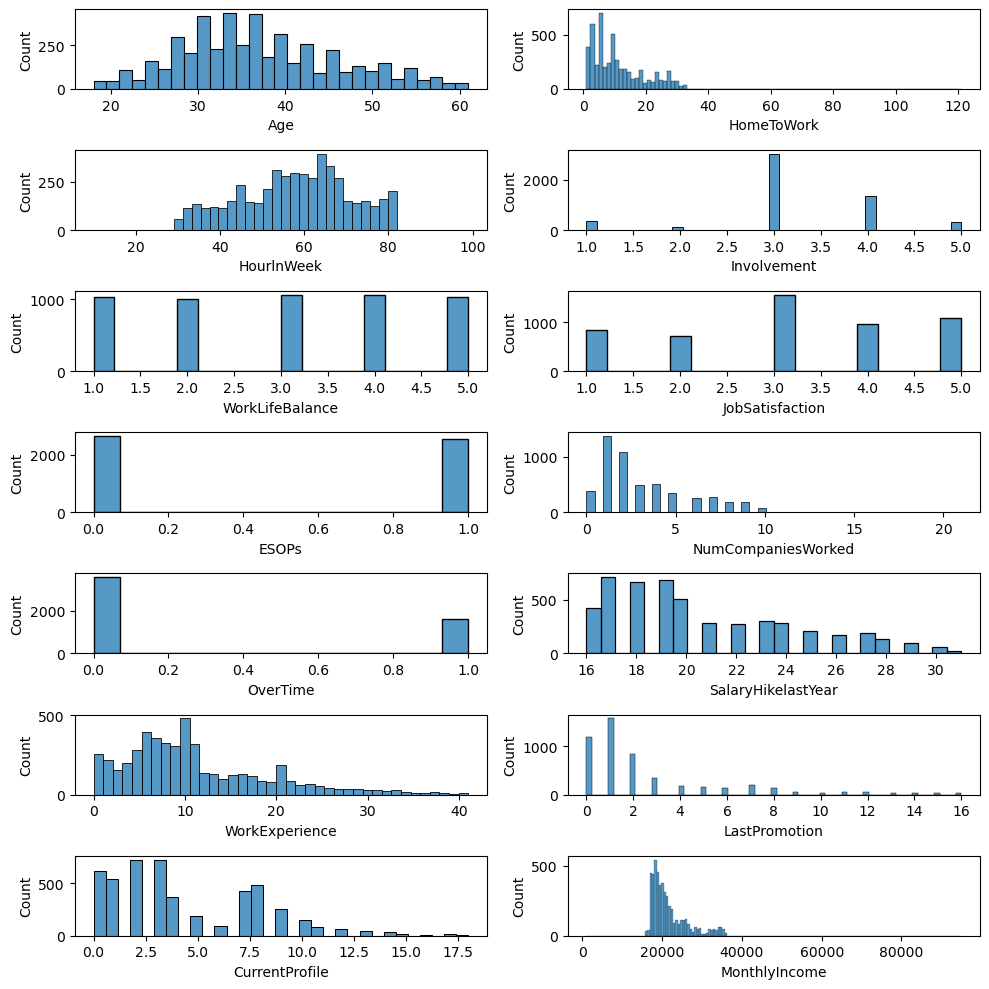

In [91]:
# Numerical columns
train_analysis_data=df_train.drop(['EmployeeID'],axis=1)

f,a=plt.subplots(7,2,figsize=(10,10),dpi=100)
num=0
for i in range(7):
    for j in range(2):
        sns.histplot(x=numerical_features[num],data=train_analysis_data,ax=a[i,j])
        num+=1

plt.tight_layout()
plt.show()

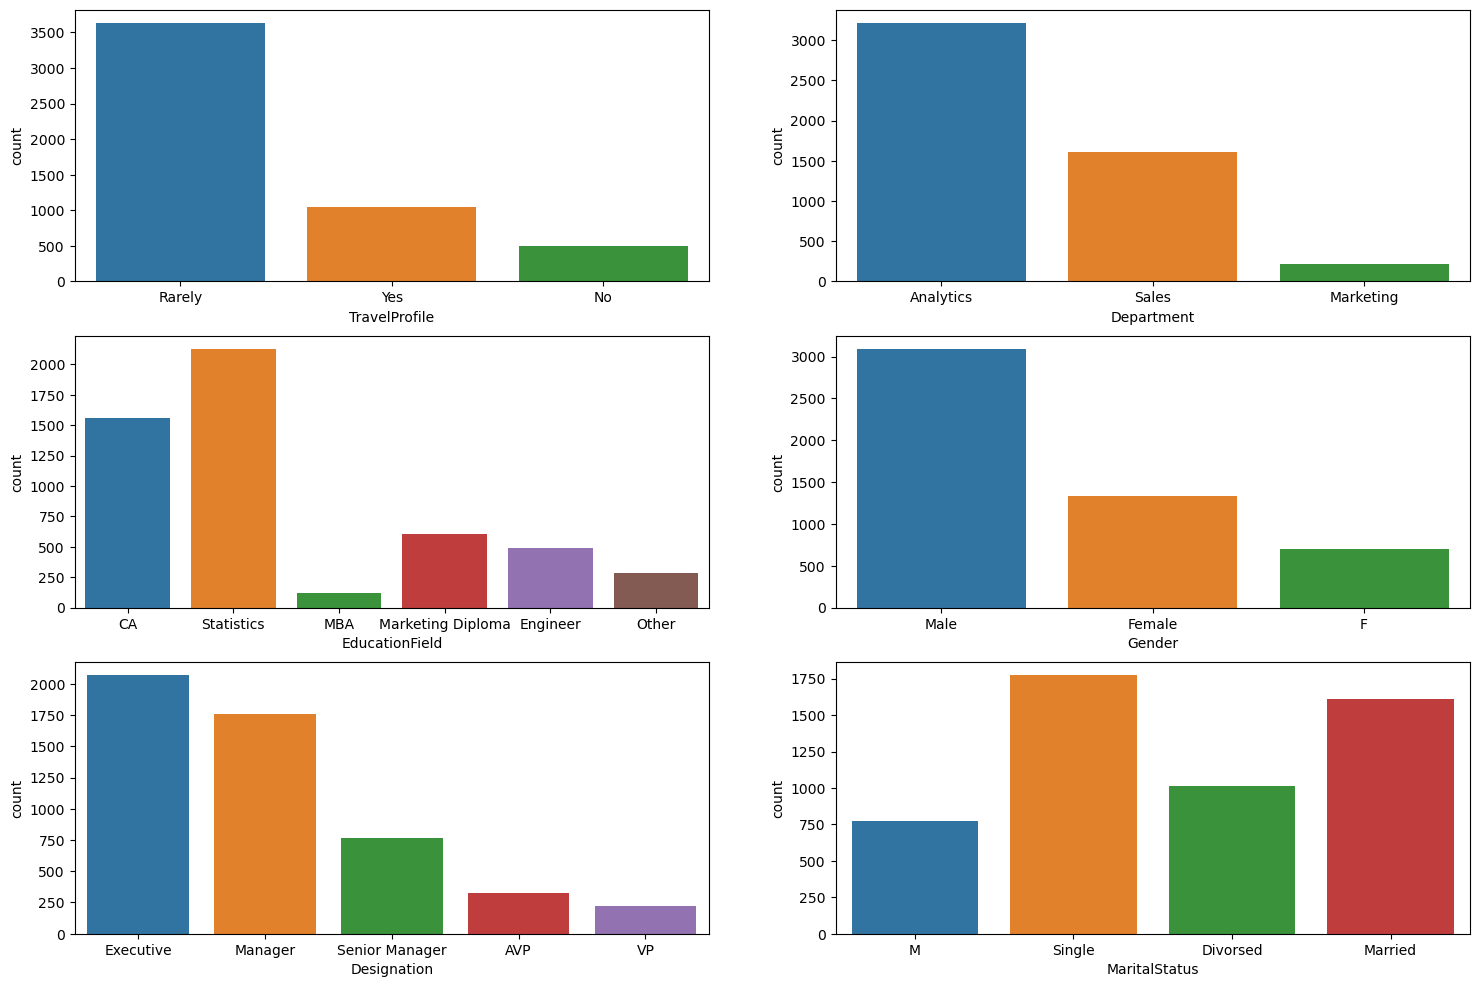

In [92]:
# Categorical columns
f,a=plt.subplots(3,2,figsize=(18,12),dpi=100)
num=0
for i in range(3):
    for j in range(2):
        sns.countplot(x=categorical_features[num],data=train_analysis_data,ax=a[i,j])
        num+=1

plt.show()

### Bivariate analysis

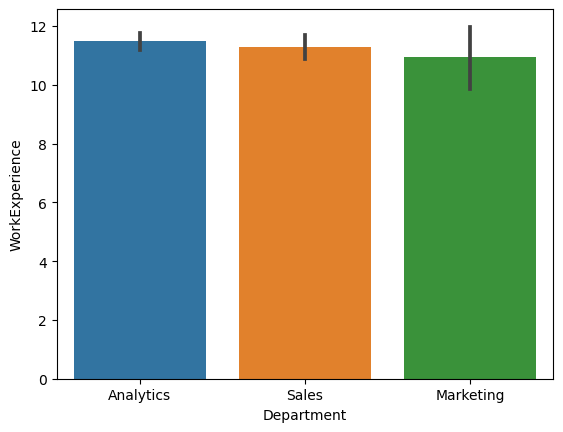

In [93]:
sns.barplot(y=train_analysis_data['WorkExperience'],
            x=train_analysis_data['Department'])
plt.show()

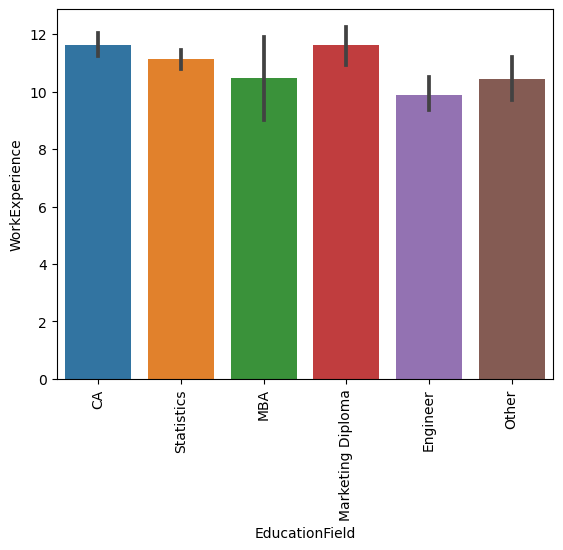

In [94]:
sns.barplot(y=train_analysis_data['WorkExperience'],
            x=train_analysis_data['EducationField'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='EducationField', ylabel='count'>

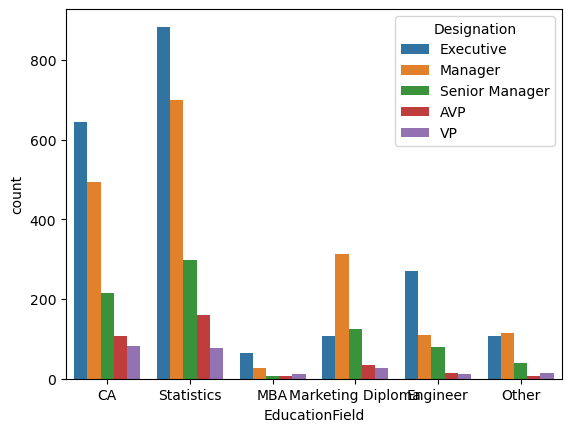

In [95]:
sns.countplot(x=train_analysis_data['EducationField'],
              hue=train_analysis_data['Designation'])

<AxesSubplot:xlabel='Age', ylabel='NumCompaniesWorked'>

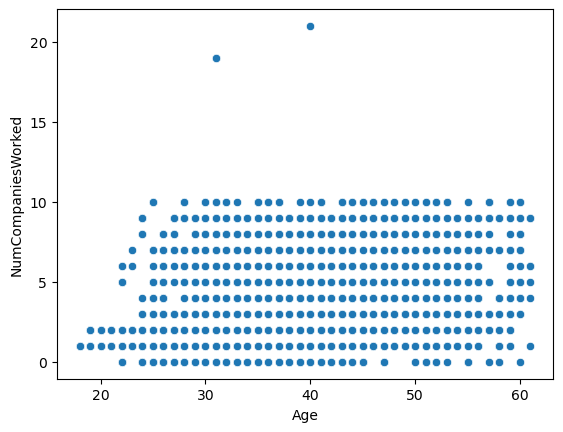

In [96]:
sns.scatterplot(x=train_analysis_data['Age'],
                y=train_analysis_data['NumCompaniesWorked'])

### Multivariate Analysis

<AxesSubplot:xlabel='HourlnWeek', ylabel='MonthlyIncome'>

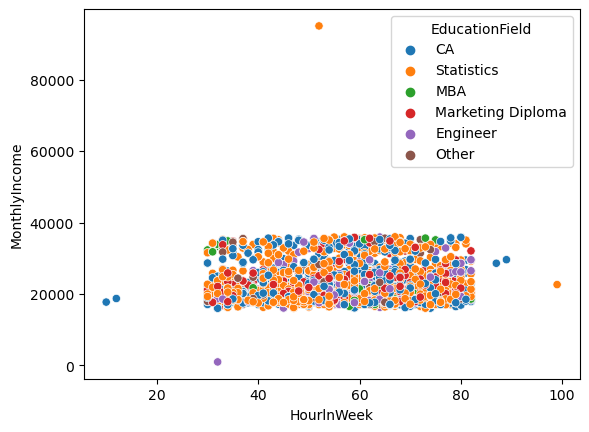

In [97]:
sns.scatterplot(x=train_analysis_data['HourlnWeek'],
                y=train_analysis_data['MonthlyIncome'],
                hue=train_analysis_data['EducationField'])

<AxesSubplot:xlabel='WorkExperience', ylabel='SalaryHikelastYear'>

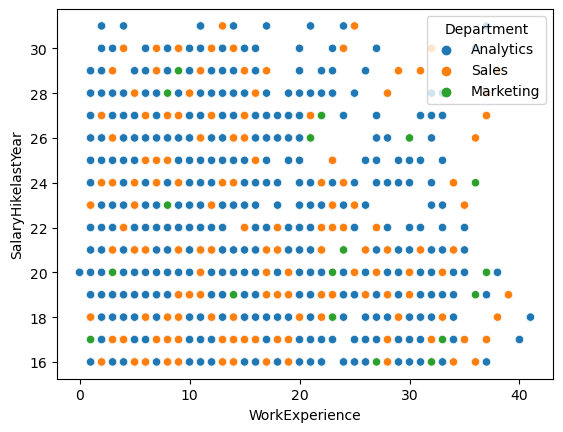

In [98]:
sns.scatterplot(x=train_analysis_data['WorkExperience'],
                y=train_analysis_data['SalaryHikelastYear'],
                hue=train_analysis_data['Department'])

### Missing value treatment

In [99]:
df_copy_x.isnull().sum()

Age                   458
TravelProfile           0
Department            182
HomeToWork            381
EducationField          0
Gender                 76
HourlnWeek            423
Involvement             0
WorkLifeBalance         0
Designation            68
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    263
WorkExperience        309
LastPromotion         127
CurrentProfile        445
MaritalStatus           0
MonthlyIncome         126
dtype: int64

In [100]:
(df_copy_x.isnull().sum()/df_copy_x.shape[0])

Age                   0.058643
TravelProfile         0.000000
Department            0.023303
HomeToWork            0.048784
EducationField        0.000000
Gender                0.009731
HourlnWeek            0.054161
Involvement           0.000000
WorkLifeBalance       0.000000
Designation           0.008707
JobSatisfaction       0.000000
ESOPs                 0.000000
NumCompaniesWorked    0.000000
OverTime              0.000000
SalaryHikelastYear    0.033675
WorkExperience        0.039565
LastPromotion         0.016261
CurrentProfile        0.056978
MaritalStatus         0.000000
MonthlyIncome         0.016133
dtype: float64

In [101]:
# In every column, missing value percentage is less than 25,hence 
# proceeding with imputation

# Checking for true numeric and true categorical columns

df_copy_x.head(10)

,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,1.0,Executive,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,3.0,Executive,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,3.0,Manager,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,2.0,Manager,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,4.0,Manager,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0
5,34.0,Yes,Marketing,24.0,MBA,F,43.0,3.0,4.0,Senior Manager,5.0,1.0,9.0,1.0,20.0,11.0,0.0,2.0,Married,24950.0
6,35.0,Yes,Sales,1.0,Marketing Diploma,F,62.0,3.0,1.0,Senior Manager,3.0,1.0,1.0,0.0,19.0,10.0,0.0,8.0,Single,23789.0
7,26.0,Rarely,Sales,8.0,Marketing Diploma,Male,48.0,4.0,2.0,Manager,3.0,1.0,2.0,1.0,17.0,7.0,1.0,4.0,Single,21744.0
8,45.0,Yes,Analytics,5.0,CA,Male,58.0,3.0,3.0,Senior Manager,3.0,0.0,6.0,1.0,24.0,17.0,3.0,3.0,Single,26209.0
9,24.0,Rarely,Sales,4.0,Statistics,Female,65.0,3.0,3.0,Manager,3.0,1.0,9.0,0.0,19.0,4.0,2.0,0.0,Single,19577.0


In [102]:
print(numerical_features)
print('\n*******\n')
print(categorical_features)

['Age', 'HomeToWork', 'HourlnWeek', 'Involvement', 'WorkLifeBalance', 'JobSatisfaction', 'ESOPs', 'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear', 'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MonthlyIncome']

*******

['TravelProfile', 'Department', 'EducationField', 'Gender', 'Designation', 'MaritalStatus']


In [103]:
# checking number of unique values in each column

for i in list(df_copy_x.columns):
    print(i,':',df_copy_x[i].nunique())

Age : 44
TravelProfile : 3
Department : 3
HomeToWork : 36
EducationField : 6
Gender : 3
HourlnWeek : 63
Involvement : 5
WorkLifeBalance : 5
Designation : 5
JobSatisfaction : 5
ESOPs : 2
NumCompaniesWorked : 15
OverTime : 2
SalaryHikelastYear : 16
WorkExperience : 42
LastPromotion : 17
CurrentProfile : 19
MaritalStatus : 4
MonthlyIncome : 2561


In [104]:
# the number of unique values is less in these columns(also visually evident from univariate analysis plots) 
#,therefore considering them as categorical and hence imputing their 
# missing values with mode

numeric_categorical=['Involvement','WorkLifeBalance','JobSatisfaction',
                    'ESOPs','OverTime']

true_numerical_features=['Age', 'HomeToWork', 'HourlnWeek', 
                        'NumCompaniesWorked', 'SalaryHikelastYear', 
                        'WorkExperience', 'LastPromotion', 
                        'CurrentProfile', 'MonthlyIncome']

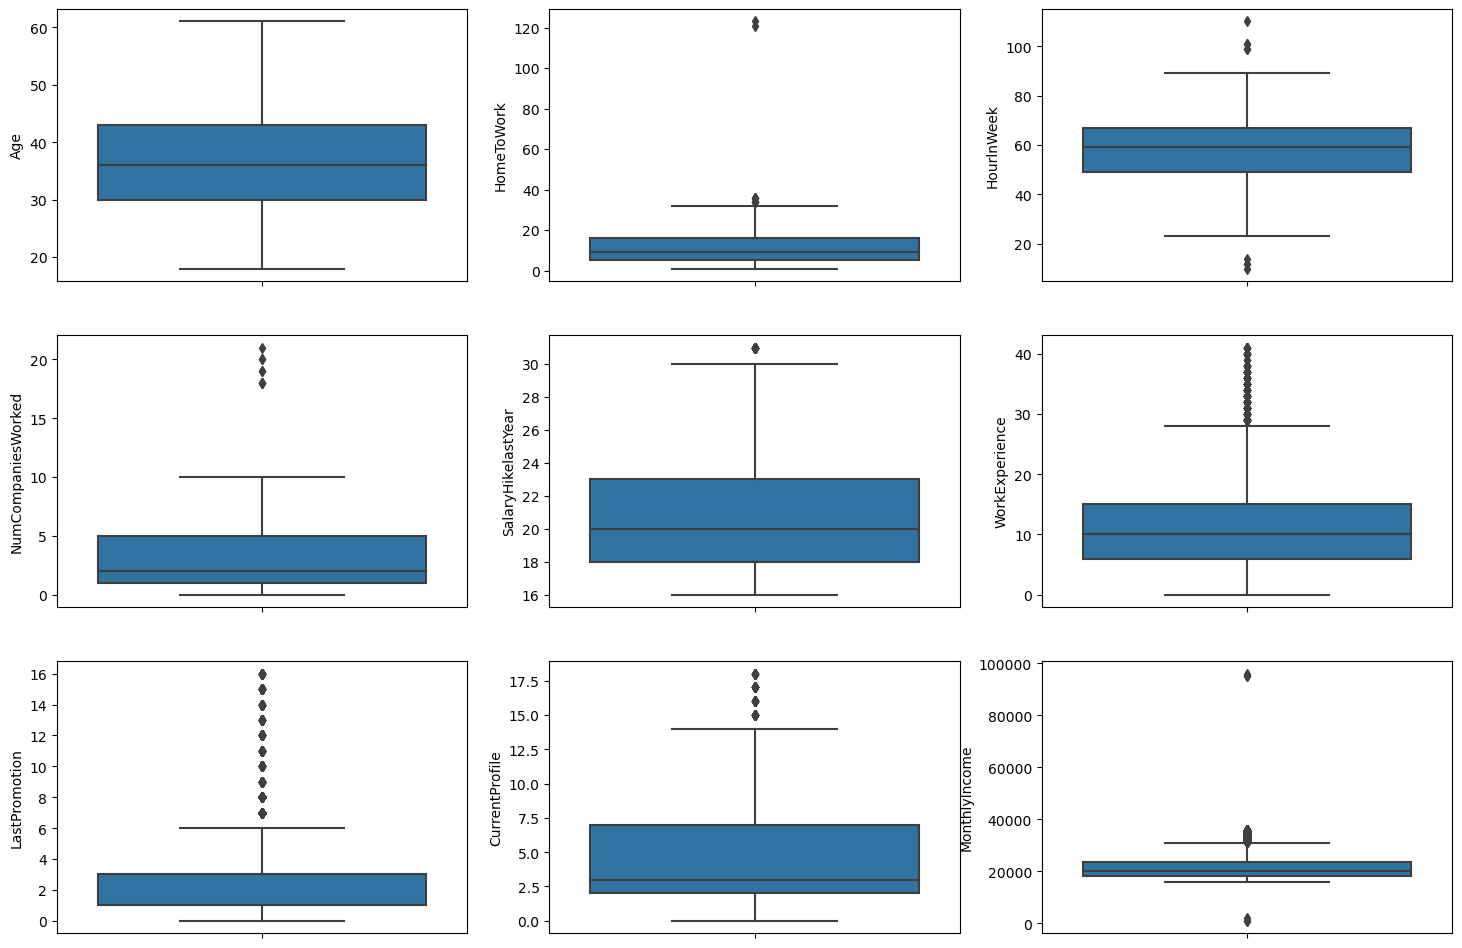

In [105]:
# checking for outliers in true numeric columns

f,a=plt.subplots(3,3,figsize=(18,12),dpi=100)
num=0
for i in range(3):
    for j in range(3):
        sns.boxplot(y=df_copy_x[true_numerical_features[num]],ax=a[i,j])
        num+=1

plt.show()

In [106]:
# except 'Age',every other column in true numeric features has outliers,
# hence going by median imputation.
for i in true_numerical_features:
    df_copy_x[i]=df_copy_x[i].fillna(df_copy_x[i].median())

In [107]:
# mode imputation for categorical columns

for i in numeric_categorical:
    df_copy_x[i]=df_copy_x[i].fillna(df_copy_x[i].mode()[0])

for j in categorical_features:
    df_copy_x[j]=df_copy_x[j].fillna(df_copy_x[j].mode()[0])
    

In [108]:
# Handling of missing values is done
df_copy_x.isnull().sum()

Age                   0
TravelProfile         0
Department            0
HomeToWork            0
EducationField        0
Gender                0
HourlnWeek            0
Involvement           0
WorkLifeBalance       0
Designation           0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MaritalStatus         0
MonthlyIncome         0
dtype: int64

In [109]:
df_copy_x.describe()

,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome
count,7810.000000,7810.000000,7810.000000,7810.000000,7810.000000,7810.000000,7810.000000,7810.000000,7810.000000,7810.000000,7810.000000,7810.000000,7810.000000,7810.000000
mean,37.144558,11.107426,57.997823,3.230986,3.031754,3.134699,0.495391,3.179385,0.319078,20.623431,11.235211,2.563252,4.345198,21712.496159
std,9.014351,8.392098,12.719835,0.876355,1.412770,1.341073,0.500011,2.625605,0.466149,3.651440,7.756069,3.237578,3.518266,4846.083460
min,18.000000,1.000000,10.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1000.000000
25%,31.000000,5.000000,50.000000,3.000000,2.000000,2.000000,0.000000,1.000000,0.000000,18.000000,6.000000,1.000000,2.000000,18398.000000
50%,36.000000,9.000000,59.000000,3.000000,3.000000,3.000000,0.000000,2.000000,0.000000,20.000000,10.000000,1.000000,3.000000,20229.000000
75%,43.000000,15.000000,67.000000,4.000000,4.000000,4.000000,1.000000,5.000000,1.000000,23.000000,15.000000,3.000000,7.000000,23380.750000
max,61.000000,123.000000,110.000000,5.000000,5.000000,5.000000,1.000000,21.000000,1.000000,31.000000,41.000000,16.000000,18.000000,96000.000000


### Handling the outliers for true numeric features

In [110]:
def outlier_treatment(column):
    
    q_3=df_copy_x[column].quantile(0.75)
    q_1=df_copy_x[column].quantile(0.25)
    IQR=q_3-q_1
    upper_limit=q_3+(1.5*IQR)
    lower_limit=q_1-(1.5*IQR)
    df_copy_x[column]=np.where(df_copy_x[column]>upper_limit,upper_limit
                              ,np.where(df_copy_x[column]<lower_limit,lower_limit,
                                       df_copy_x[column]))

In [111]:
for i in true_numerical_features:
    outlier_treatment(i)

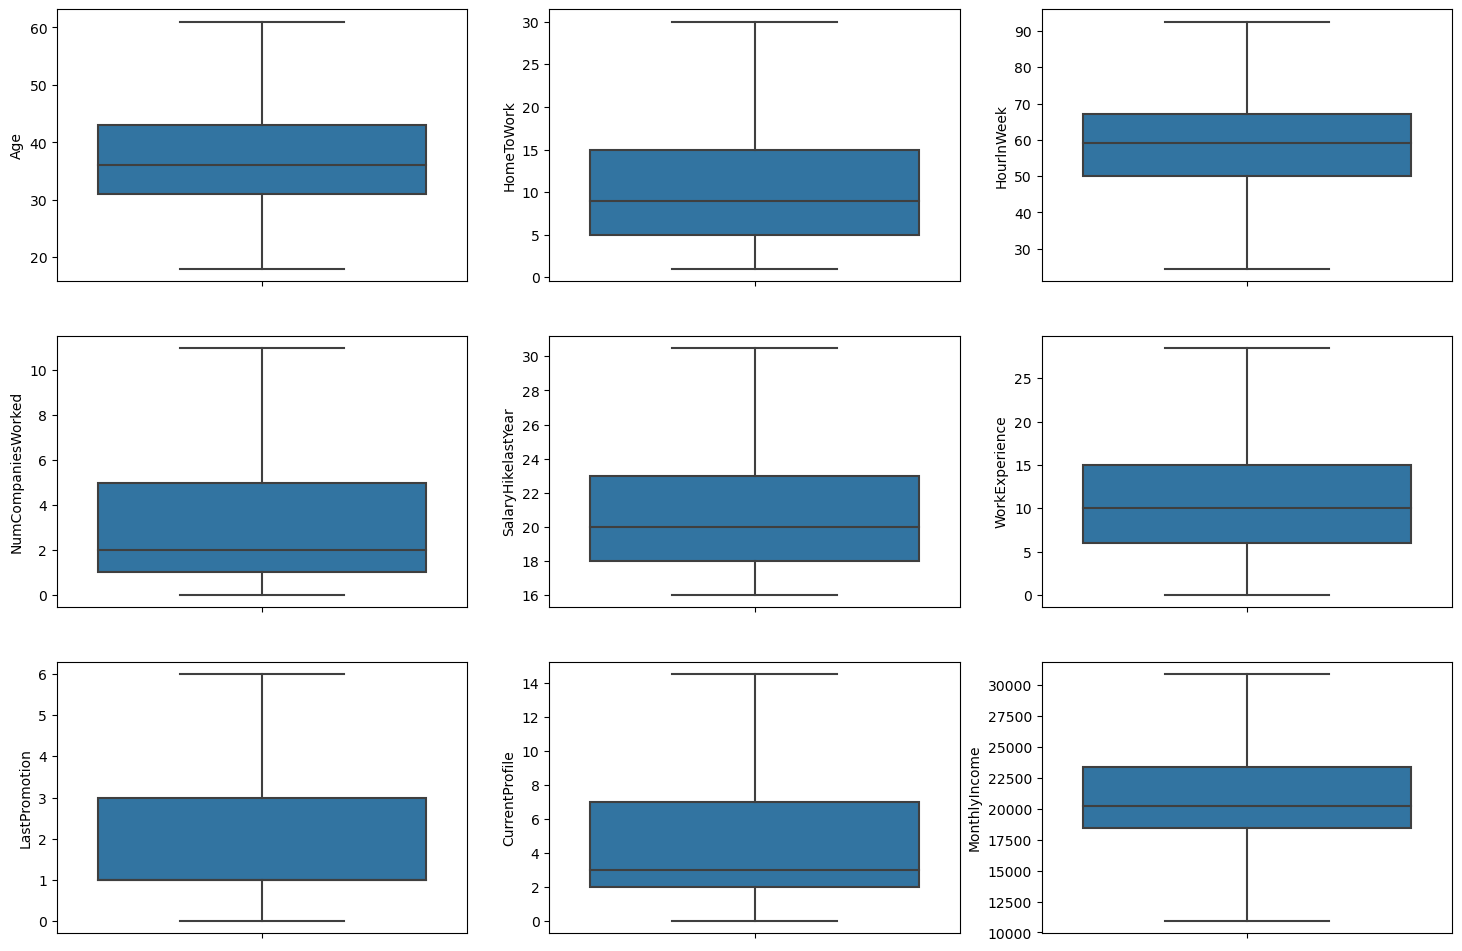

In [112]:
# Outlier handled
f,a=plt.subplots(3,3,figsize=(18,12),dpi=100)
num=0
for i in range(3):
    for j in range(3):
        sns.boxplot(y=df_copy_x[true_numerical_features[num]],ax=a[i,j])
        num+=1

plt.show()

In [113]:
# Encoding of categorical features
print(categorical_features)
print('\n******\n')
print(numeric_categorical)

['TravelProfile', 'Department', 'EducationField', 'Gender', 'Designation', 'MaritalStatus']

******

['Involvement', 'WorkLifeBalance', 'JobSatisfaction', 'ESOPs', 'OverTime']


In [114]:
df_copy_x['TravelProfile'].value_counts()

Rarely    5489
Yes       1580
No         741
Name: TravelProfile, dtype: int64

In [115]:
df_copy_x = pd.get_dummies(df_copy_x, columns=['TravelProfile'])
df_copy_x.head()

,Age,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,...,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,TravelProfile_No,TravelProfile_Rarely,TravelProfile_Yes
0,35.0,Analytics,5.0,CA,Male,69.0,1.0,1.0,Executive,1.0,...,1.0,20.0,7.0,2.0,3.0,M,18932.0,0,1,0
1,32.0,Sales,5.0,Statistics,Female,62.0,4.0,3.0,Executive,2.0,...,0.0,20.0,4.0,1.0,3.0,Single,18785.0,0,0,1
2,31.0,Analytics,5.0,Statistics,F,45.0,5.0,3.0,Manager,2.0,...,0.0,26.0,12.0,1.0,3.0,Single,22091.0,0,1,0
3,34.0,Sales,10.0,Statistics,Female,32.0,3.0,2.0,Manager,4.0,...,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0,0,0,1
4,37.0,Analytics,27.0,Statistics,Female,49.0,3.0,4.0,Manager,4.0,...,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0,1,0,0


In [116]:
df_copy_x.drop(['TravelProfile_No'],axis=1,inplace=True)
df_copy_x.head()

,Age,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,...,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,TravelProfile_Rarely,TravelProfile_Yes
0,35.0,Analytics,5.0,CA,Male,69.0,1.0,1.0,Executive,1.0,...,1.0,1.0,20.0,7.0,2.0,3.0,M,18932.0,1,0
1,32.0,Sales,5.0,Statistics,Female,62.0,4.0,3.0,Executive,2.0,...,8.0,0.0,20.0,4.0,1.0,3.0,Single,18785.0,0,1
2,31.0,Analytics,5.0,Statistics,F,45.0,5.0,3.0,Manager,2.0,...,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0,1,0
3,34.0,Sales,10.0,Statistics,Female,32.0,3.0,2.0,Manager,4.0,...,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0,0,1
4,37.0,Analytics,27.0,Statistics,Female,49.0,3.0,4.0,Manager,4.0,...,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0,0,0


In [117]:
df_copy_x['Department'].value_counts()

Analytics    5076
Sales        2407
Marketing     327
Name: Department, dtype: int64

In [118]:
df_copy_x = pd.get_dummies(df_copy_x, columns=['Department'])
df_copy_x.head(2)

,Age,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,...,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,TravelProfile_Rarely,TravelProfile_Yes,Department_Analytics,Department_Marketing,Department_Sales
0,35.0,5.0,CA,Male,69.0,1.0,1.0,Executive,1.0,1.0,...,7.0,2.0,3.0,M,18932.0,1,0,1,0,0
1,32.0,5.0,Statistics,Female,62.0,4.0,3.0,Executive,2.0,0.0,...,4.0,1.0,3.0,Single,18785.0,0,1,0,0,1


In [119]:
df_copy_x.drop(['Department_Marketing'],axis=1,inplace=True)
df_copy_x.head(2)

,Age,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,...,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,TravelProfile_Rarely,TravelProfile_Yes,Department_Analytics,Department_Sales
0,35.0,5.0,CA,Male,69.0,1.0,1.0,Executive,1.0,1.0,...,20.0,7.0,2.0,3.0,M,18932.0,1,0,1,0
1,32.0,5.0,Statistics,Female,62.0,4.0,3.0,Executive,2.0,0.0,...,20.0,4.0,1.0,3.0,Single,18785.0,0,1,0,1


In [120]:
df_copy_x['Gender'].value_counts()

Male      4744
Female    2020
F         1046
Name: Gender, dtype: int64

In [121]:
df_copy_x['Gender']=np.where(df_copy_x['Gender']=='F','Female'
                              ,df_copy_x['Gender'])

df_copy_x['Gender'].value_counts()

Male      4744
Female    3066
Name: Gender, dtype: int64

In [122]:
df_copy_x = pd.get_dummies(df_copy_x, columns=['Gender'])
df_copy_x.head(2)

,Age,HomeToWork,EducationField,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,...,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,TravelProfile_Rarely,TravelProfile_Yes,Department_Analytics,Department_Sales,Gender_Female,Gender_Male
0,35.0,5.0,CA,69.0,1.0,1.0,Executive,1.0,1.0,1.0,...,2.0,3.0,M,18932.0,1,0,1,0,0,1
1,32.0,5.0,Statistics,62.0,4.0,3.0,Executive,2.0,0.0,8.0,...,1.0,3.0,Single,18785.0,0,1,0,1,1,0


In [123]:
df_copy_x.drop(['Gender_Male'],axis=1,inplace=True)
df_copy_x.head(2)

,Age,HomeToWork,EducationField,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,...,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,TravelProfile_Rarely,TravelProfile_Yes,Department_Analytics,Department_Sales,Gender_Female
0,35.0,5.0,CA,69.0,1.0,1.0,Executive,1.0,1.0,1.0,...,7.0,2.0,3.0,M,18932.0,1,0,1,0,0
1,32.0,5.0,Statistics,62.0,4.0,3.0,Executive,2.0,0.0,8.0,...,4.0,1.0,3.0,Single,18785.0,0,1,0,1,1


In [124]:
df_copy_x['MaritalStatus'].value_counts()

Single      2709
Married     2455
Divorsed    1493
M           1153
Name: MaritalStatus, dtype: int64

In [125]:
df_copy_x['MaritalStatus']=np.where(df_copy_x['MaritalStatus']=='M','Married'
                              ,df_copy_x['MaritalStatus'])
df_copy_x['MaritalStatus'].value_counts()


Married     3608
Single      2709
Divorsed    1493
Name: MaritalStatus, dtype: int64

In [126]:
df_copy_x = pd.get_dummies(df_copy_x, columns=['MaritalStatus'])
df_copy_x.head(2)

,Age,HomeToWork,EducationField,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,...,CurrentProfile,MonthlyIncome,TravelProfile_Rarely,TravelProfile_Yes,Department_Analytics,Department_Sales,Gender_Female,MaritalStatus_Divorsed,MaritalStatus_Married,MaritalStatus_Single
0,35.0,5.0,CA,69.0,1.0,1.0,Executive,1.0,1.0,1.0,...,3.0,18932.0,1,0,1,0,0,0,1,0
1,32.0,5.0,Statistics,62.0,4.0,3.0,Executive,2.0,0.0,8.0,...,3.0,18785.0,0,1,0,1,1,0,0,1


In [127]:
df_copy_x.drop(['MaritalStatus_Divorsed'],axis=1,inplace=True)
df_copy_x.head(2)

,Age,HomeToWork,EducationField,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,...,LastPromotion,CurrentProfile,MonthlyIncome,TravelProfile_Rarely,TravelProfile_Yes,Department_Analytics,Department_Sales,Gender_Female,MaritalStatus_Married,MaritalStatus_Single
0,35.0,5.0,CA,69.0,1.0,1.0,Executive,1.0,1.0,1.0,...,2.0,3.0,18932.0,1,0,1,0,0,1,0
1,32.0,5.0,Statistics,62.0,4.0,3.0,Executive,2.0,0.0,8.0,...,1.0,3.0,18785.0,0,1,0,1,1,0,1


In [128]:
df_copy_x['Involvement'].value_counts() 
#given as numeric and since  logical ordering required,hence sticking with label encoded format

3.0    4540
4.0    2053
1.0     544
5.0     504
2.0     169
Name: Involvement, dtype: int64

In [129]:
df_copy_x['WorkLifeBalance'].value_counts()
#given as numeric and since  logical ordering required,hence sticking with label encoded format

4.0    1635
5.0    1586
3.0    1558
1.0    1528
2.0    1503
Name: WorkLifeBalance, dtype: int64

In [130]:
df_copy_x['JobSatisfaction'].value_counts()
#given as numeric and since  logical ordering required,hence sticking with label encoded format

3.0    2363
5.0    1615
4.0    1476
1.0    1298
2.0    1058
Name: JobSatisfaction, dtype: int64

In [131]:
df_copy_x['ESOPs'].value_counts()

0.0    3941
1.0    3869
Name: ESOPs, dtype: int64

In [132]:
df_copy_x['OverTime'].value_counts()

0.0    5318
1.0    2492
Name: OverTime, dtype: int64

In [133]:
df_copy_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    7810 non-null   float64
 1   HomeToWork             7810 non-null   float64
 2   EducationField         7810 non-null   object 
 3   HourlnWeek             7810 non-null   float64
 4   Involvement            7810 non-null   float64
 5   WorkLifeBalance        7810 non-null   float64
 6   Designation            7810 non-null   object 
 7   JobSatisfaction        7810 non-null   float64
 8   ESOPs                  7810 non-null   float64
 9   NumCompaniesWorked     7810 non-null   float64
 10  OverTime               7810 non-null   float64
 11  SalaryHikelastYear     7810 non-null   float64
 12  WorkExperience         7810 non-null   float64
 13  LastPromotion          7810 non-null   float64
 14  CurrentProfile         7810 non-null   float64
 15  Mont

In [134]:
df_copy_x['Designation'].value_counts()

Executive         3133
Manager           2676
Senior Manager    1154
AVP                507
VP                 340
Name: Designation, dtype: int64

In [135]:
df_copy_x['Designation'] = df_copy_x['Designation'].astype('category')
df_copy_x['Designation'] = df_copy_x['Designation'].cat.codes

In [136]:
df_copy_x['Designation'].value_counts()

1    3133
2    2676
3    1154
0     507
4     340
Name: Designation, dtype: int64

In [137]:
df_copy_x['EducationField'] = df_copy_x['EducationField'].astype('category')
df_copy_x['EducationField'] = df_copy_x['EducationField'].cat.codes

In [138]:
df_copy_x['EducationField'].value_counts()

5    3169
0    2417
3     894
1     750
4     429
2     151
Name: EducationField, dtype: int64

In [139]:
# encoding done
df_copy_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    7810 non-null   float64
 1   HomeToWork             7810 non-null   float64
 2   EducationField         7810 non-null   int8   
 3   HourlnWeek             7810 non-null   float64
 4   Involvement            7810 non-null   float64
 5   WorkLifeBalance        7810 non-null   float64
 6   Designation            7810 non-null   int8   
 7   JobSatisfaction        7810 non-null   float64
 8   ESOPs                  7810 non-null   float64
 9   NumCompaniesWorked     7810 non-null   float64
 10  OverTime               7810 non-null   float64
 11  SalaryHikelastYear     7810 non-null   float64
 12  WorkExperience         7810 non-null   float64
 13  LastPromotion          7810 non-null   float64
 14  CurrentProfile         7810 non-null   float64
 15  Mont

In [140]:
df_copy_x.head()

,Age,HomeToWork,EducationField,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,...,LastPromotion,CurrentProfile,MonthlyIncome,TravelProfile_Rarely,TravelProfile_Yes,Department_Analytics,Department_Sales,Gender_Female,MaritalStatus_Married,MaritalStatus_Single
0,35.0,5.0,0,69.0,1.0,1.0,1,1.0,1.0,1.0,...,2.0,3.0,18932.0,1,0,1,0,0,1,0
1,32.0,5.0,5,62.0,4.0,3.0,1,2.0,0.0,8.0,...,1.0,3.0,18785.0,0,1,0,1,1,0,1
2,31.0,5.0,5,45.0,5.0,3.0,2,2.0,1.0,3.0,...,1.0,3.0,22091.0,1,0,1,0,1,0,1
3,34.0,10.0,5,32.0,3.0,2.0,2,4.0,1.0,1.0,...,1.0,3.0,20302.0,0,1,0,1,1,0,0
4,37.0,27.0,5,49.0,3.0,4.0,2,4.0,1.0,8.0,...,1.0,9.0,21674.0,0,0,1,0,1,0,0


### Feature scaling

In [141]:
sc=StandardScaler()
df_copy_x['MonthlyIncome']=sc.fit_transform(df_copy_x[['MonthlyIncome']])

In [142]:
df_copy_x.head()

,Age,HomeToWork,EducationField,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,...,LastPromotion,CurrentProfile,MonthlyIncome,TravelProfile_Rarely,TravelProfile_Yes,Department_Analytics,Department_Sales,Gender_Female,MaritalStatus_Married,MaritalStatus_Single
0,35.0,5.0,0,69.0,1.0,1.0,1,1.0,1.0,1.0,...,2.0,3.0,-0.624865,1,0,1,0,0,1,0
1,32.0,5.0,5,62.0,4.0,3.0,1,2.0,0.0,8.0,...,1.0,3.0,-0.660983,0,1,0,1,1,0,1
2,31.0,5.0,5,45.0,5.0,3.0,2,2.0,1.0,3.0,...,1.0,3.0,0.151304,1,0,1,0,1,0,1
3,34.0,10.0,5,32.0,3.0,2.0,2,4.0,1.0,1.0,...,1.0,3.0,-0.288255,0,1,0,1,1,0,0
4,37.0,27.0,5,49.0,3.0,4.0,2,4.0,1.0,8.0,...,1.0,9.0,0.048847,0,0,1,0,1,0,0


In [143]:
df_copy_x['HourlnWeek']=sc.fit_transform(df_copy_x[['HourlnWeek']])

In [144]:
df_copy_x['Age']=sc.fit_transform(df_copy_x[['Age']])

In [145]:
df_copy_x['HomeToWork']=sc.fit_transform(df_copy_x[['HomeToWork']])

In [146]:
df_copy_x.head()

,Age,HomeToWork,EducationField,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,...,LastPromotion,CurrentProfile,MonthlyIncome,TravelProfile_Rarely,TravelProfile_Yes,Department_Analytics,Department_Sales,Gender_Female,MaritalStatus_Married,MaritalStatus_Single
0,-0.237920,-0.743980,0,0.867694,1.0,1.0,1,1.0,1.0,1.0,...,2.0,3.0,-0.624865,1,0,1,0,0,1,0
1,-0.570744,-0.743980,5,0.315609,4.0,3.0,1,2.0,0.0,8.0,...,1.0,3.0,-0.660983,0,1,0,1,1,0,1
2,-0.681685,-0.743980,5,-1.025170,5.0,3.0,2,2.0,1.0,3.0,...,1.0,3.0,0.151304,1,0,1,0,1,0,1
3,-0.348861,-0.129829,5,-2.050471,3.0,2.0,2,4.0,1.0,1.0,...,1.0,3.0,-0.288255,0,1,0,1,1,0,0
4,-0.016037,1.958284,5,-0.709693,3.0,4.0,2,4.0,1.0,8.0,...,1.0,9.0,0.048847,0,0,1,0,1,0,0


In [147]:
#spliting the data back to train and test
train_x=df_copy_x.iloc[0:5180,:]
test_x=df_copy_x.iloc[5180:,:]

In [148]:
train_x.shape

(5180, 23)

In [149]:
test_x.shape

(2630, 23)

In [150]:
train_y=df_comb_y[df_comb_y['Attrition']!='test_data']
train_y.shape

(5180, 1)

In [151]:
# Checking the imbalance of the dependent variable
train_y.value_counts()


Attrition
0.0          3735
1.0          1445
dtype: int64

### Splitting train and validation sets

In [152]:
x_train,x_val,y_train,y_val=train_test_split(train_x,train_y,test_size=.2,random_state=108,stratify=train_y)

In [153]:
print(x_train.shape,x_val.shape,y_train.shape,y_val.shape)

(4144, 23) (1036, 23) (4144, 1) (1036, 1)


In [154]:
# Converting object type to int
y_train=y_train.astype('int')
y_val=y_val.astype('int')

### Building the LogisticRegression model

In [155]:
lr=LogisticRegression()
lr

LogisticRegression()

In [156]:
lr.fit(x_train,y_train)

LogisticRegression()

In [157]:
y_train_pred=lr.predict(x_train)

In [158]:
print('Train data accuracy :',accuracy_score(y_train,y_train_pred))

Train data accuracy : 0.8129826254826255


In [159]:
y_pred=lr.predict(x_val)

In [160]:
print('Validation data accuracy :',accuracy_score(y_val,y_pred))

Validation data accuracy : 0.7731660231660231


In [161]:
# K fold cross validation score
accuracy_cross_val=cross_val_score(lr,x_train,y_train,cv=10)
print("Cross Validation Accuracy scores : ", accuracy_cross_val)
print('\n*****\n')
print("Mean of Cross Validation Accuracy scores : ",accuracy_cross_val.mean())
print('\n*****\n')
print("Max of Cross Validation Accuracy scores : ",accuracy_cross_val.max())
print('\n*****\n')
print("Min of Cross Validation Accuracy scores : ",accuracy_cross_val.min())

Cross Validation Accuracy scores :  [0.83373494 0.80722892 0.82650602 0.79277108 0.82850242 0.78743961
 0.8115942  0.81400966 0.8115942  0.79710145]

*****

Mean of Cross Validation Accuracy scores :  0.8110482509749142

*****

Max of Cross Validation Accuracy scores :  0.8337349397590361

*****

Min of Cross Validation Accuracy scores :  0.7874396135265701


In [162]:
from sklearn.metrics import classification_report
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       747
           1       0.62      0.48      0.54       289

    accuracy                           0.77      1036
   macro avg       0.72      0.68      0.70      1036
weighted avg       0.76      0.77      0.76      1036



In [164]:
# Trying to improve the model further
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='log')
sgd.fit(x_train,y_train)

SGDClassifier(loss='log')

In [167]:
y_train_pred_sgd=sgd.predict(x_train)
y_val_pred_sgd=sgd.predict(x_val)
print('Train data accuracy :',accuracy_score(y_train,y_train_pred_sgd))
print('Validation data accuracy :',accuracy_score(y_val,y_val_pred_sgd))

Train data accuracy : 0.771476833976834
Validation data accuracy : 0.7731660231660231


In [95]:
# logistic regression  model using statsmodel package for p value checking

log_reg_sm = sm.Logit(y_train,x_train).fit()
log_reg_sm.summary()

Optimization terminated successfully.
         Current function value: 0.445851
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 4144
Model:                          Logit   Df Residuals:                     4121
Method:                           MLE   Df Model:                           22
Date:                Sat, 24 Feb 2024   Pseudo R-squ.:                  0.2468
Time:                        19:33:21   Log-Likelihood:                -1847.6
converged:                       True   LL-Null:                       -2453.1
Covariance Type:            nonrobust   LLR p-value:                2.010e-242
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Age                      -0.1640      0.054     -3.014      0.003      -0.271      -0.057
HomeToWork                0.2996      0.042      7.218      0.000       0.218       0.381
EducationField           -0.0645      0.019     -3.437      0.001      -0.101      -0.028
HourlnWeek                0.0652      0.042      1.547      0.122      -0.017       0.148
Involvement               0.2208      0.047      4.728      0.000       0.129       0.312
WorkLifeBalance          -0.0638      0.029     -2.238      0.025      -0.120      -0.008
Designation              -0.1291      0.058     -2.219      0.026      -0.243      -0.015
JobSatisfaction           0.2315      0.031      7.517      0.000       0.171       0.292
ESOPs                     0.0014      0.081      0.017      0.986      -0.158       0.161
NumCompaniesWorked        0.1148      0.017      6.762      0.000       0.082       0.148
OverTime                  1.5457      0.086     17.879      0.000       1.376       1.715
SalaryHikelastYear       -0.0697      0.010     -7.081      0.000      -0.089      -0.050
WorkExperience           -0.0544      0.012     -4.574      0.000      -0.078      -0.031
LastPromotion             0.1659      0.026      6.414      0.000       0.115       0.217
CurrentProfile           -0.1491      0.018     -8.369      0.000      -0.184      -0.114
MonthlyIncome            -0.2238      0.077     -2.909      0.004      -0.375      -0.073
TravelProfile_Rarely      0.3220      0.141      2.278      0.023       0.045       0.599
TravelProfile_Yes         0.9473      0.158      5.996      0.000       0.638       1.257
Department_Analytics     -1.2128      0.173     -7.016      0.000      -1.552      -0.874
Department_Sales         -0.6296      0.180     -3.492      0.000      -0.983      -0.276
Gender_Female            -0.4632      0.086     -5.391      0.000      -0.632      -0.295
MaritalStatus_Married    -0.4495      0.111     -4.065      0.000      -0.666      -0.233
MaritalStatus_Single      0.7580      0.111      6.833      0.000       0.541       0.975
=========================================================================================
"""

### p-values of 'HourlnWeek' and 'ESOPs' are greater than 0.05,hence dropping them


In [100]:
x_train.head()

,Age,HomeToWork,EducationField,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,...,LastPromotion,CurrentProfile,MonthlyIncome,TravelProfile_Rarely,TravelProfile_Yes,Department_Analytics,Department_Sales,Gender_Female,MaritalStatus_Married,MaritalStatus_Single
2172,-0.570744,-0.621149,0,1.340910,3.0,5.0,3,3.0,0.0,10.0,...,3.0,3.0,2.014699,0,1,1,0,0,1,0
4718,0.982434,2.203944,5,1.892995,3.0,3.0,2,5.0,0.0,3.0,...,1.0,1.0,-0.292186,0,1,0,1,1,0,0
4271,-0.459803,2.203944,3,1.892995,3.0,4.0,2,2.0,1.0,1.0,...,3.0,3.0,-0.248206,0,0,0,1,0,0,0
1541,0.538669,-0.989640,3,0.788824,3.0,5.0,2,5.0,0.0,1.0,...,2.0,8.0,-0.337149,0,1,0,1,1,1,0
725,-0.903568,1.958284,0,-0.394215,3.0,1.0,1,4.0,1.0,2.0,...,1.0,1.0,-0.753612,1,0,1,0,0,1,0


In [102]:
x_train_new=x_train.copy()
x_train_new.head()

,Age,HomeToWork,EducationField,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,...,LastPromotion,CurrentProfile,MonthlyIncome,TravelProfile_Rarely,TravelProfile_Yes,Department_Analytics,Department_Sales,Gender_Female,MaritalStatus_Married,MaritalStatus_Single
2172,-0.570744,-0.621149,0,1.340910,3.0,5.0,3,3.0,0.0,10.0,...,3.0,3.0,2.014699,0,1,1,0,0,1,0
4718,0.982434,2.203944,5,1.892995,3.0,3.0,2,5.0,0.0,3.0,...,1.0,1.0,-0.292186,0,1,0,1,1,0,0
4271,-0.459803,2.203944,3,1.892995,3.0,4.0,2,2.0,1.0,1.0,...,3.0,3.0,-0.248206,0,0,0,1,0,0,0
1541,0.538669,-0.989640,3,0.788824,3.0,5.0,2,5.0,0.0,1.0,...,2.0,8.0,-0.337149,0,1,0,1,1,1,0
725,-0.903568,1.958284,0,-0.394215,3.0,1.0,1,4.0,1.0,2.0,...,1.0,1.0,-0.753612,1,0,1,0,0,1,0


In [105]:
x_train_new.drop(['HourlnWeek', 'ESOPs'],axis=1,inplace=True)

In [106]:
x_train_new.head()

,Age,HomeToWork,EducationField,Involvement,WorkLifeBalance,Designation,JobSatisfaction,NumCompaniesWorked,OverTime,SalaryHikelastYear,...,LastPromotion,CurrentProfile,MonthlyIncome,TravelProfile_Rarely,TravelProfile_Yes,Department_Analytics,Department_Sales,Gender_Female,MaritalStatus_Married,MaritalStatus_Single
2172,-0.570744,-0.621149,0,3.0,5.0,3,3.0,10.0,0.0,18.0,...,3.0,3.0,2.014699,0,1,1,0,0,1,0
4718,0.982434,2.203944,5,3.0,3.0,2,5.0,3.0,0.0,20.0,...,1.0,1.0,-0.292186,0,1,0,1,1,0,0
4271,-0.459803,2.203944,3,3.0,4.0,2,2.0,1.0,0.0,24.0,...,3.0,3.0,-0.248206,0,0,0,1,0,0,0
1541,0.538669,-0.989640,3,3.0,5.0,2,5.0,1.0,0.0,23.0,...,2.0,8.0,-0.337149,0,1,0,1,1,1,0
725,-0.903568,1.958284,0,3.0,1.0,1,4.0,2.0,1.0,23.0,...,1.0,1.0,-0.753612,1,0,1,0,0,1,0


In [107]:
x_val_new=x_val.copy()

In [108]:
x_val_new.drop(['HourlnWeek', 'ESOPs'],axis=1,inplace=True)
x_val_new.head()

,Age,HomeToWork,EducationField,Involvement,WorkLifeBalance,Designation,JobSatisfaction,NumCompaniesWorked,OverTime,SalaryHikelastYear,...,LastPromotion,CurrentProfile,MonthlyIncome,TravelProfile_Rarely,TravelProfile_Yes,Department_Analytics,Department_Sales,Gender_Female,MaritalStatus_Married,MaritalStatus_Single
2782,0.427728,-0.375489,1,1.0,4.0,1,3.0,1.0,0.0,18.0,...,0.0,8.0,-0.761475,1,0,1,0,1,0,0
398,0.760552,1.589794,0,3.0,1.0,1,1.0,8.0,0.0,26.0,...,2.0,3.0,-0.790468,0,1,1,0,0,1,0
892,-0.459803,-1.235300,5,4.0,4.0,2,2.0,0.0,0.0,19.0,...,1.0,4.0,0.116414,1,0,1,0,1,0,1
1658,-1.014509,-0.743980,3,3.0,1.0,1,5.0,1.0,0.0,17.0,...,1.0,3.0,-0.598084,1,0,0,1,0,1,0
1752,0.871493,2.326775,4,3.0,4.0,2,1.0,2.0,0.0,30.5,...,6.0,14.5,-0.229532,1,0,1,0,0,0,1


In [111]:
# Building the model

lr.fit(x_train_new,y_train)
y_pred_train_1=lr.predict(x_train_new)
y_pred_val_1=lr.predict(x_val_new)
print('Train data accuracy :',accuracy_score(y_train,y_pred_train_1))
print('Validation data accuracy :',accuracy_score(y_val,y_pred_val_1))

0.8110521235521235
0.777992277992278


In [112]:
# K fold cross validation score
accuracy_cross_val=cross_val_score(lr,x_train_new,y_train,cv=10)
print("Cross Validation Accuracy scores : ", accuracy_cross_val)
print('\n*****\n')
print("Mean of Cross Validation Accuracy scores : ",accuracy_cross_val.mean())
print('\n*****\n')
print("Max of Cross Validation Accuracy scores : ",accuracy_cross_val.max())
print('\n*****\n')
print("Min of Cross Validation Accuracy scores : ",accuracy_cross_val.min())

Cross Validation Accuracy scores :  [0.82650602 0.80722892 0.82168675 0.79036145 0.81884058 0.79227053
 0.81400966 0.81400966 0.81400966 0.79951691]

*****

Mean of Cross Validation Accuracy scores :  0.8098440137361038

*****

Max of Cross Validation Accuracy scores :  0.8265060240963855

*****

Min of Cross Validation Accuracy scores :  0.7903614457831325


In [131]:
print(classification_report(y_val,y_pred_val_1))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       747
           1       0.64      0.47      0.54       289

    accuracy                           0.78      1036
   macro avg       0.73      0.68      0.70      1036
weighted avg       0.77      0.78      0.77      1036



In [118]:
# oversampling to balance the imbalanced data
train_x_new=train_x.copy()
train_y_new=train_y.copy()

In [119]:
train_y_new.value_counts()

Attrition
0.0          3735
1.0          1445
dtype: int64

In [122]:
# Converting object type to int
train_y_new=train_y_new.astype('int')

In [123]:
from imblearn.over_sampling import SMOTE
s=SMOTE()
train_x_with_smote,train_y_with_smote=s.fit_resample(train_x_new,train_y_new)


In [124]:
train_y_with_smote.value_counts()

Attrition
0            3735
1            3735
dtype: int64

In [126]:
x_train_smote,x_val_smote,y_train_smote,y_val_smote=train_test_split(train_x_with_smote,train_y_with_smote,test_size=.2,random_state=108,stratify=train_y_with_smote)

In [127]:
print(x_train_smote.shape,x_val_smote.shape,y_train_smote.shape,y_val_smote.shape)

(5976, 23) (1494, 23) (5976, 1) (1494, 1)


In [128]:
lr.fit(x_train_smote,y_train_smote)
y_pred_train_smote=lr.predict(x_train_smote)
y_pred_val_smote=lr.predict(x_val_smote)
print('Train data accuracy :'accuracy_score(y_train_smote,y_pred_train_smote))
print('Validation data accuracy :'accuracy_score(y_val_smote,y_pred_val_smote))

0.7523427041499331
0.7182061579651942


In [129]:
# K fold cross validation score
accuracy_cross_val=cross_val_score(lr,x_train_smote,y_train_smote,cv=10)
print("Cross Validation Accuracy scores : ", accuracy_cross_val)
print('\n*****\n')
print("Mean of Cross Validation Accuracy scores : ",accuracy_cross_val.mean())
print('\n*****\n')
print("Max of Cross Validation Accuracy scores : ",accuracy_cross_val.max())
print('\n*****\n')
print("Min of Cross Validation Accuracy scores : ",accuracy_cross_val.min())

Cross Validation Accuracy scores :  [0.7173913  0.73913043 0.77424749 0.77090301 0.75585284 0.74247492
 0.78224456 0.72194305 0.7520938  0.73869347]

*****

Mean of Cross Validation Accuracy scores :  0.7494974874371859

*****

Max of Cross Validation Accuracy scores :  0.7822445561139029

*****

Min of Cross Validation Accuracy scores :  0.717391304347826


In [130]:
print(classification_report(y_val_smote,y_pred_val_smote))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       747
           1       0.71      0.74      0.73       747

    accuracy                           0.72      1494
   macro avg       0.72      0.72      0.72      1494
weighted avg       0.72      0.72      0.72      1494



In [135]:
# dropping the 'HourlnWeek', 'ESOPs' columns within smote applied data 
x_train_smote.drop(['HourlnWeek', 'ESOPs'],axis=1,inplace=True)
x_train_smote.head()

,Age,HomeToWork,EducationField,Involvement,WorkLifeBalance,Designation,JobSatisfaction,NumCompaniesWorked,OverTime,SalaryHikelastYear,...,LastPromotion,CurrentProfile,MonthlyIncome,TravelProfile_Rarely,TravelProfile_Yes,Department_Analytics,Department_Sales,Gender_Female,MaritalStatus_Married,MaritalStatus_Single
6055,0.845729,-0.206754,3,3.626269,5.0,1,2.626269,1.0,1.0,19.0,...,0.0,2.0,-0.964803,0,0,0,1,0,0,0
2856,-1.014509,-0.743980,0,3.000000,2.0,2,3.000000,1.0,0.0,20.0,...,0.0,4.0,-0.553858,0,0,0,1,0,1,0
2375,-1.791099,-0.621149,0,3.000000,1.0,1,5.000000,1.0,1.0,16.0,...,1.0,2.0,-1.006193,1,0,0,1,0,0,1
5052,-0.126979,2.081114,0,3.000000,2.0,3,3.000000,2.0,1.0,17.0,...,6.0,2.0,1.207081,1,0,1,0,1,1,0
3156,0.427728,-0.252659,3,3.000000,1.0,2,4.000000,5.0,0.0,26.0,...,1.0,4.0,-0.511597,1,0,0,1,1,1,0


In [136]:
x_val_smote.drop(['HourlnWeek', 'ESOPs'],axis=1,inplace=True)
x_val_smote.head()

,Age,HomeToWork,EducationField,Involvement,WorkLifeBalance,Designation,JobSatisfaction,NumCompaniesWorked,OverTime,SalaryHikelastYear,...,LastPromotion,CurrentProfile,MonthlyIncome,TravelProfile_Rarely,TravelProfile_Yes,Department_Analytics,Department_Sales,Gender_Female,MaritalStatus_Married,MaritalStatus_Single
3246,-1.680157,-0.375489,0,3.0,1.000000,1,5.000000,2.00000,1.0,17.00000,...,2.00000,3.00000,-0.760492,1,0,0,1,0,0,1
7143,-0.955996,-0.491581,1,3.0,2.054861,1,3.000000,1.52743,1.0,18.52743,...,2.52743,2.52743,-0.615914,1,0,1,0,0,0,1
2933,-0.459803,-0.252659,3,3.0,2.000000,2,3.000000,0.00000,0.0,17.00000,...,1.00000,2.00000,0.154498,1,0,0,1,0,1,0
5587,2.424672,-0.743980,5,4.0,1.000000,1,1.888273,10.00000,1.0,20.00000,...,1.00000,1.00000,-0.760492,0,1,1,0,0,1,0
475,-0.459803,0.729982,3,3.0,3.000000,2,5.000000,5.00000,0.0,20.00000,...,0.00000,2.00000,-0.282850,1,0,0,1,1,0,1


In [137]:
lr.fit(x_train_smote,y_train_smote)
y_pred_train_smote_drop=lr.predict(x_train_smote)
y_pred_val_smote_drop=lr.predict(x_val_smote)
print('Train data accuracy :'accuracy_score(y_train_smote,y_pred_train_smote_drop))
print('Validation data accuracy :'accuracy_score(y_val_smote,y_pred_val_smote_drop))

0.7561914323962516
0.7182061579651942


In [138]:
# K fold cross validation score
accuracy_cross_val=cross_val_score(lr,x_train_smote,y_train_smote,cv=10)
print("Cross Validation Accuracy scores : ", accuracy_cross_val)
print('\n*****\n')
print("Mean of Cross Validation Accuracy scores : ",accuracy_cross_val.mean())
print('\n*****\n')
print("Max of Cross Validation Accuracy scores : ",accuracy_cross_val.max())
print('\n*****\n')
print("Min of Cross Validation Accuracy scores : ",accuracy_cross_val.min())

Cross Validation Accuracy scores :  [0.72408027 0.74080268 0.77090301 0.77591973 0.75585284 0.74916388
 0.77721943 0.7319933  0.74874372 0.7319933 ]

*****

Mean of Cross Validation Accuracy scores :  0.7506672156770475

*****

Max of Cross Validation Accuracy scores :  0.7772194304857621

*****

Min of Cross Validation Accuracy scores :  0.7240802675585284


In [139]:
print(classification_report(y_val_smote,y_pred_val_smote_drop))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       747
           1       0.71      0.75      0.73       747

    accuracy                           0.72      1494
   macro avg       0.72      0.72      0.72      1494
weighted avg       0.72      0.72      0.72      1494



### Linear model ie., logistic regresion gives a maximum accuracy of 81.29% on train data and 77.31% on validation data and the accuracy doesn't seem to improve.This may be due to non linear separable nature in the dataset.Hence proceeding with non linear models

In [204]:
# Trying non-linear models-Random forest 
rf=RandomForestClassifier(n_estimators=20)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [205]:
y_pred=rf.predict(x_val)

In [206]:
print('Validation data accuracy :'accuracy_score(y_val,y_pred))

0.9768339768339769


In [207]:
print('Train data accuracy :'accuracy_score(rf.predict(x_train),y_train))

1.0


In [208]:
accuracy_cross_val=cross_val_score(rf,x_train,y_train,cv=10)
print("Cross Validation Accuracy scores : ", accuracy_cross_val)
print('\n*****\n')
print("Mean of Cross Validation Accuracy scores : ",accuracy_cross_val.mean())
print('\n*****\n')
print("Max of Cross Validation Accuracy scores : ",accuracy_cross_val.max())
print('\n*****\n')
print("Min of Cross Validation Accuracy scores : ",accuracy_cross_val.min())

Cross Validation Accuracy scores :  [0.96626506 0.95662651 0.97349398 0.97108434 0.96376812 0.96618357
 0.97826087 0.99275362 0.96135266 0.97584541]

*****

Mean of Cross Validation Accuracy scores :  0.9705634130725802

*****

Max of Cross Validation Accuracy scores :  0.9927536231884058

*****

Min of Cross Validation Accuracy scores :  0.9566265060240964


In [213]:
# Balancing data with smote
train_x_with_smote,train_y_with_smote=s.fit_resample(train_x_new,train_y_new)

x_train_smote,x_val_smote,y_train_smote,y_val_smote=train_test_split(train_x_with_smote,train_y_with_smote,test_size=.2,random_state=108,stratify=train_y_with_smote)

print(x_train_smote.shape,x_val_smote.shape,y_train_smote.shape,y_val_smote.shape)

train_y_with_smote.value_counts()

(5976, 23) (1494, 23) (5976, 1) (1494, 1)


Attrition
0            3735
1            3735
dtype: int64

In [214]:
# With smote applied data

rf.fit(x_train_smote,y_train_smote)
y_pred_train_smote=rf.predict(x_train_smote)
y_pred_val_smote=rf.predict(x_val_smote)
print('Train data accuracy :'accuracy_score(y_train_smote,y_pred_train_smote))
print('Validation data accuracy :'accuracy_score(y_val_smote,y_pred_val_smote))

1.0
0.9779116465863453


In [216]:
accuracy_cross_val=cross_val_score(rf,x_train,y_train,cv=10)
print("Cross Validation Accuracy scores : ", accuracy_cross_val)
print('\n*****\n')
print("Mean of Cross Validation Accuracy scores : ",accuracy_cross_val.mean())
print('\n*****\n')
print("Max of Cross Validation Accuracy scores : ",accuracy_cross_val.max())
print('\n*****\n')
print("Min of Cross Validation Accuracy scores : ",accuracy_cross_val.min())

Cross Validation Accuracy scores :  [0.98313253 0.96385542 0.96385542 0.97831325 0.97826087 0.96376812
 0.96618357 0.98067633 0.96135266 0.97826087]

*****

Mean of Cross Validation Accuracy scores :  0.9717659041964961

*****

Max of Cross Validation Accuracy scores :  0.983132530120482

*****

Min of Cross Validation Accuracy scores :  0.961352657004831


## Feature importances 

In [217]:
features=pd.DataFrame(index = x_train_smote.columns, data=rf.feature_importances_,
            columns=["Feature Importance"])
features=features.sort_values(by=['Feature Importance'])

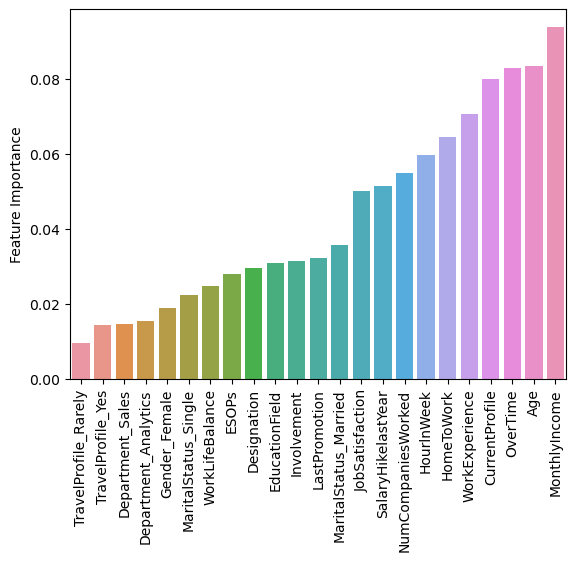

In [218]:
sns.barplot(x=features.index ,y = 'Feature Importance',data = features)
plt.xticks(rotation=90)
plt.show()

### From the above graph ,it is evident that Age,MonthlyIncome,Currentprofile and OverTime work are the topmost important features contributing to Attrition of employees and their TravelProfile and Deparatment are the least important with respect to Attrition

In [225]:
# Best Random Forest model
rf=RandomForestClassifier(n_estimators=15,max_features='sqrt')
rf.fit(x_train_smote,y_train_smote)
y_pred_train_smote_1=rf.predict(x_train_smote)
y_pred_val_smote_1=rf.predict(x_val_smote)
print('Train data accuracy :'accuracy_score(y_train_smote,y_pred_train_smote_1))
print('Validation data accuracy :'accuracy_score(y_val_smote,y_pred_val_smote_1))

0.9998326639892905
0.9812583668005355


In [226]:
accuracy_cross_val=cross_val_score(rf,x_train_smote,y_train_smote,cv=10)
print("Cross Validation Accuracy scores : ", accuracy_cross_val)
print('\n*****\n')
print("Mean of Cross Validation Accuracy scores : ",accuracy_cross_val.mean())
print('\n*****\n')
print("Max of Cross Validation Accuracy scores : ",accuracy_cross_val.max())
print('\n*****\n')
print("Min of Cross Validation Accuracy scores : ",accuracy_cross_val.min())

Cross Validation Accuracy scores :  [0.96655518 0.97993311 0.96655518 0.98494983 0.97658863 0.98160535
 0.97152429 0.97822446 0.95477387 0.97654941]

*****

Mean of Cross Validation Accuracy scores :  0.973725931777057

*****

Max of Cross Validation Accuracy scores :  0.9849498327759197

*****

Min of Cross Validation Accuracy scores :  0.9547738693467337


### Random Forest model gives the best accuracy of 99.98% on train data and 98.12% on validation data

In [228]:
# Prediction on test data
test_data_prediction=rf.predict(test_x)

In [229]:
test_data_prediction

array([1, 0, 0, ..., 0, 1, 0])

In [236]:
test_data_prediction.shape

(2630,)

In [237]:
# storing test data predictions into a dataframe
final_prediction=pd.DataFrame(df_test['EmployeeID'])

In [239]:
final_prediction['Attrition']=test_data_prediction

In [240]:
final_prediction

,EmployeeID,Attrition
0,6110001,1
1,6110002,0
2,6110003,0
3,6110004,1
4,6110005,0
...,...,...
2625,6112626,0
2626,6112627,0
2627,6112628,0
2628,6112629,1


### Saving the final prediction on test data into a csv file

In [243]:
final_prediction.to_csv('capstoneproject_submission_attrition_data.csv',index=False)